In [20]:
#importing libraries

import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas import DatetimeIndex, Series, to_datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict


### 1) Loading the Data

In [21]:
sf=pd.read_csv('../Problem-Sets/data/San Francisco Crime by Neighborhood and Tract.csv')
sf.head()

,neighborhood,Month_Year,number_crimes,tractce10,VC03,VC04,VC05,VC06,VC07,VC08,...,VC206,VC207,VC208,VC209,VC210,VC211,VC212,VC216,VC217,VC218
0,North Beach,01/2003,168,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
1,North Beach,01/2004,162,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
2,North Beach,01/2005,174,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
3,North Beach,01/2006,185,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
4,North Beach,01/2007,153,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN


### 2) Test and Tweak Model


#### 2.1 Use your trained models to perform predictions on the validation set. Then, choose your best model from the validation set, and use it to perform predictions on the the test set. 


In [22]:
sf['Month_Year'] = pd.to_datetime(sf['Month_Year'])
sf_dropped = sf.dropna(axis = 1)
sf_dropped = sf_dropped.drop(['VC21', 'VC54', 'VC55','VC57','VC58'], axis = 1)
X = sf_dropped.drop(['number_crimes', 'neighborhood', 'Month_Year','tractce10' ], axis=1)
y = sf_dropped['number_crimes']

In [23]:
X.shape

(35295, 140)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [25]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

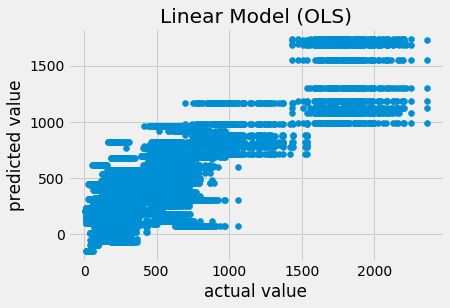

227.33788747698605

In [26]:
#LINEAR REGRESSION
lin_reg = LinearRegression(normalize=True)
# fit the model
lin_model = lin_reg.fit(X_train, y_train)
lin_pred = lin_model.predict(X_train)
plt.scatter(y_train, lin_pred)
plt.title('Linear Model (OLS)')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()
rmse(lin_pred, y_train)


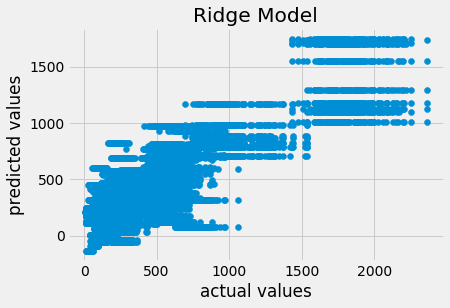

227.15448282102167

In [27]:
#RIDGE REGRESSION
ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_train)
plt.scatter(y_train, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()
rmse(ridge_pred, y_train)

/Users/jarellymartin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


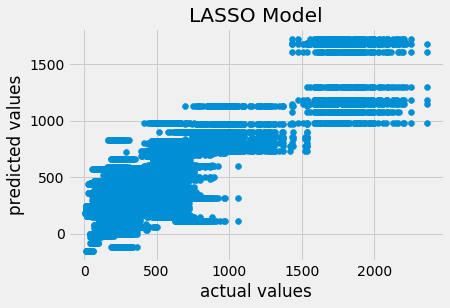

229.43180658008745

In [28]:
#LASSO REGRESSION
lasso_reg = Lasso(max_iter=10000)  
lasso_model = lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_train)
plt.scatter(y_train, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()
rmse(lasso_pred, y_train)

In [29]:
lin_vpred = lin_model.predict(X_validate)
ridge_vpred = ridge_model.predict(X_validate)
lasso_vpred = lasso_model.predict(X_validate)

print("linear model rmse: ", rmse(lin_vpred, y_validate))
print("Ridge rmse: ", rmse(ridge_vpred, y_validate))
print("LASSO rmse: ", rmse(lasso_vpred, y_validate))
                           
print("linear r2: ", r2_score(y_validate, lin_vpred))
print("ridge r2: ", r2_score(y_validate, ridge_vpred))
print("lasso r2: ", r2_score(y_validate, lasso_vpred))




linear model rmse:  228.9739097346355
Ridge rmse:  228.83230817919173
LASSO rmse:  230.65884031532389
linear r2:  0.6723433985378748
ridge r2:  0.6727485306177969
lasso r2:  0.6675034593926259


In [30]:
final_pred = ridge_model.predict(X_test)
# calculate the rmse for the final predictions
print('Test set rmse: ', rmse(final_pred, y_test))
                              


Test set rmse:  227.97451820200905


* Which model(s) has the best performance on the validation set? In addition to the metrics you choose, also report the correlation (Pearson) between your predicted values and the observed values. 

        The model that has the best performance on the validation set is my ridge model. 

* Why is it good practice to do a train/validation/test split, instead of just a train/test split?
        
         The reason why its good practice to perform the train/validation/test split is because it allows us to  avoid any overfitting problems and can be used on small data sets (we can't say the same thing about the train/test split). In using cross-validation we are about see how our model performs on unseen data, since its simulating a test error (on our folds) without having to use the test set. 

* In general, should predictions in the validation and test sets be more or less accurate than predictions on the training set? Why?

        Typically they should be less accurate because we trained our model on the training set. This means that when we use our model on both the validation and test sets it is predicting on unseen data. As a result, the error is typically higher.

#### 2.2 Also implement a cross-validation approach

What are the advantages and disdvantages of cross-validation vs. the typical train-validation-test split?

        The advantages of the cross-validation approach as mentioned aboved is that it tends to avoid any overftting problems, can be used on small data sets (where we are typically unable to do so for a train-validation-test split). Another thing to mention is that with this method we are able to see how well our model is performing on unseen data, since its simulating a test error without having to even use the test set. As a result, we are able to estimate both model bias and model variance. But some of the disadvantages that come with using this method is that it can take too long and assumes that the out-of-sample data was drawn from the same population as the training set.

In [31]:
lin_predicted = cross_val_predict(lin_reg, X, y, cv = 5)
r2_score(y, lin_predicted)

-2.148652320883303

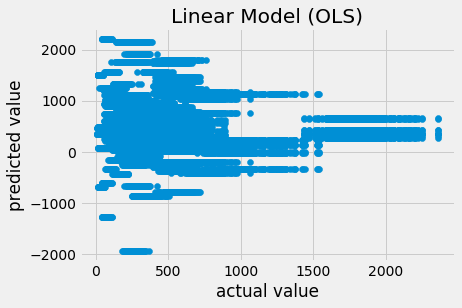

In [32]:
plt.scatter(y, lin_predicted)
plt.title('Linear Model (OLS)')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [33]:
ridge_predicted = cross_val_predict(ridge_reg, X, y, cv = 5)
r2_score(y, ridge_predicted)

-2.131521373592543

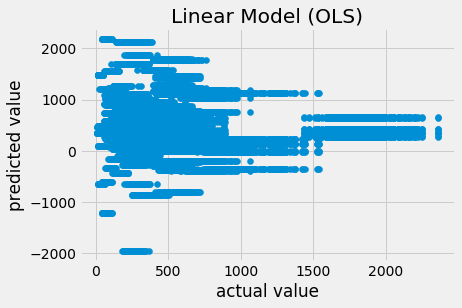

In [34]:
plt.scatter(y, ridge_predicted)
plt.title('Linear Model (OLS)')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [35]:
# lasso_predicted = cross_val_predict(lasso_reg, X, y, cv = 5)
# r2_score(y, lasso_predicted)

In [36]:
# plt.scatter(y, lasso_predicted)
# plt.title('Linear Model (OLS)')
# plt.xlabel('actual value')
# plt.ylabel('predicted value')
# plt.show()

### 3) Generalize to a new Dataset


#### 3.1 Now let's test the model on a brand new dataset. Download the cleaned NYPD data from bcourses, and predict neighborhood crime rates in New York City

Choose your best/preferred model. How accurate is it?

        From the above I picked the ridge regression model, since it was the best model. I then used that model for the brand new nyc dataset.

In [37]:
nyc = pd.read_csv('../Problem-Sets/data/NY Crime By Neighborhood.csv')
nyc.head()

,Month_Year,number_crimes,tract_no,neighborhood,VC03,VC04,VC05,VC06,VC07,VC08,...,VC206,VC207,VC208,VC209,VC210,VC211,VC212,VC216,VC217,VC218
0,01/1999,1,100,Rikers Island,0,0,0,0,0,0,...,0,63,0,0,5,0,283,NaN,NaN,NaN
1,01/2002,1,100,Rikers Island,0,0,0,0,0,0,...,0,63,0,0,5,0,283,NaN,NaN,NaN
2,01/2003,2,100,Rikers Island,0,0,0,0,0,0,...,0,63,0,0,5,0,283,NaN,NaN,NaN
3,01/2005,3,100,Rikers Island,0,0,0,0,0,0,...,0,63,0,0,5,0,283,NaN,NaN,NaN
4,01/2006,155,100,Rikers Island,0,0,0,0,0,0,...,0,63,0,0,5,0,283,NaN,NaN,NaN


In [38]:
nyc_dropped  = nyc.dropna(axis = 1)


Below, I am looking at the dropped columns in the original datasets of both SF and NYC in order to drop the same columns and not have an issue when using my model to predict on the new NYC dataset.

In [39]:
sf_columns  = list(sf_dropped.columns)
nyc_columns = list(nyc_dropped.columns)

sfdropped_columns = []
for i in list(sf.columns):
    if i not in sf_columns:
        sfdropped_columns.append(i)


In [40]:
nycdropped_columns = []
for i in list(nyc.columns):
    if i not in nyc_columns:
        nycdropped_columns.append(i)


In [41]:
new_X = nyc_dropped.drop(['number_crimes', 'neighborhood', 'tract_no'], axis=1)
new_y = nyc['number_crimes']
new_X.shape


(375423, 140)

In [42]:
nyc_lin_pred=ridge_model.predict(new_X)
print('Test set rmse: ', rmse(nyc_lin_pred,new_y))

Test set rmse:  1613.0433738498048


#### 3.2 In general, what are the potential challenges with extrapolating from data trained on a San Francisco dataset to a New York City dataset?

    Since we trained our model on the San Francisco dataset when we used the model on our New York City dataset it did very poorly given the large rmse score of 1585. In using the model, we assumed that both San Francisco and New York City are very similar cities and face the same amount of crime. But this isn't necessarily the case, since both cities have a completeley different civic makeup, demographics, number of crimes, and etc. Given that our model learned the San Francisco dataset and its number of crimes it won't be able to do same for a completely different city across the country. 

### 4) Discussion Questions 

#### 4.1 Define bias-variance tradeoff. Why is it relevant to prediction in machine learning?

       To begin, the bias is the difference between the estimator's expected value and the true value of the parameter, then the variance is the measure of dispersion in our data. More specifically he bias-variance tradeoff is the tradeoff that occurs when you are trying to minmize the bias and variance. For instance, is you want to minmize the bias then that might occur in an increase in variance and say you want to minimize the variance then we might increase the bias. This is relevant to prediction in machine learning bcause both high-bias and high-variance might result in a poor model which might not be able to predict accurately. 


#### 4.2 Define overfitting. Why does this phenomenon tend to arise in the machine learning process, and what can be done to correct for it?

        Overfitting is when your model "too closely" or "too exactly" predicts your dataset. If overfitting does occur then that might raise some issues where you would want to use your model on unseen data and it won't be able to predit accurately since it is too close to your previous dataset. With this being said, we can introcude a penalty (called regularization) to your loss function and prevent model from modeling noisy data. 

#### 4.3 What are the disadvantage and advantage of using a predictive algorithm to predict neighborhood crime?

Some of the disadvantage when using this predictive algorithm is that we are indirectly profiling and targeting communities of color. This is to say that my algorithm will overly predict high crime in neighborhoods that are black and brown even though some of the features that were used are indirectly related to race. In other words this algorithm won't target or predict a high crime for predomently white communities and less likely to get overpoliced like communities of color. 
